<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools</div>
<div style="text-align: right">Zhe Xu, Yixin Guo, 20 February 2019</div>

# Assignment 5: Data science and analysis on Houston Rockets
-----------------------


Import python libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.optimize import fmin
sns.set_context('notebook')
import pymc3 as pm
from scipy import stats
from statsmodels.formula.api import ols
RANDOM_SEED = 20190220

We download the data for Hoston Rocket 's season 1998-2018, ranging from game played to 3-point made every game. 

In [3]:
stats = pd.read_csv('data/HoustonRocket.csv', parse_dates=True )
stats.head()

,SEASON,GP,W,L,W%,AST%,REB%,3PM%,3PA%,PTS,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,2018,57,33,24,0.578947,20.754386,41.631579,15.596491,44.842105,6449,...,1450,78.2,609,1764,2373,1183,477,302,784,1292
1,2017,82,65,17,0.792683,21.548780,43.463415,15.317073,42.317073,9213,...,2061,78.1,739,2825,3564,1767,699,392,1135,1597
2,2016,82,55,27,0.670732,25.243902,44.365854,14.402439,40.317073,9458,...,2177,76.6,892,2746,3638,2070,670,352,1240,1634
3,2015,82,41,41,0.500000,22.207317,43.060976,10.707317,30.890244,8737,...,2407,69.4,930,2601,3531,1821,821,430,1307,1790
4,2014,82,56,26,0.682927,22.195122,43.682927,11.378049,32.682927,8522,...,2133,71.5,958,2624,3582,1820,777,407,1366,1803


We select Houston Rockets as our target for its extraordinary Three-Point attempt, so we suppose 3P%(3-point FGs),
3PM%(3-point made every game)

In [5]:
three=stats['3P%'].values
three

array([34.8, 36.2, 35.7, 34.7, 34.8, 35.8, 36.6, 35.9, 36.7, 35.1, 37.5,
       34.2, 37.2, 33.2, 36.4, 36.6, 34.6, 33.5, 35.7, 35.8, 36.8])

In [6]:
three_m = stats['3PA%'].values
three_m

array([44.84210526, 42.31707317, 40.31707317, 30.8902439 , 32.68292683,
       26.57317073, 28.8902439 , 20.15151515, 22.47560976, 22.41463415,
       20.19512195, 20.81707317, 23.08536585, 17.24390244, 18.54878049,
       17.14634146, 15.45121951, 18.04878049, 17.2195122 , 19.81707317,
       18.28      ])

Read  Win percentage

In [13]:
y= stats["W%"]
y

0     0.578947
1     0.792683
2     0.670732
3     0.500000
4     0.682927
5     0.658537
6     0.548780
7     0.515152
8     0.524390
9     0.512195
10    0.646341
11    0.670732
12    0.634146
13    0.414634
14    0.621951
15    0.548780
16    0.524390
17    0.341463
18    0.548780
19    0.414634
20    0.620000
Name: W%, dtype: float64

Except Three-point, rebound and assist per game are also potential factor for winning games.

In [14]:
reb = stats['REB%'].values
reb

array([41.63157895, 43.46341463, 44.36585366, 43.06097561, 43.68292683,
       45.32926829, 43.42682927, 42.16666667, 42.81707317, 41.97560976,
       42.97560976, 44.64634146, 43.32926829, 41.63414634, 42.37804878,
       42.6097561 , 43.75609756, 41.90243902, 41.98780488, 43.82926829,
       41.52      ])

In [15]:
ast = stats['AST%'].values
ast

array([20.75438596, 21.54878049, 25.24390244, 22.20731707, 22.19512195,
       21.40243902, 23.19512195, 21.27272727, 23.84146341, 21.82926829,
       20.26829268, 21.42682927, 20.7804878 , 19.26829268, 21.13414634,
       19.25609756, 18.36585366, 18.07317073, 19.67073171, 21.63414634,
       21.16      ])

We will select the parameters that minimize the squared error of the model. Let's write the cost function:

In [16]:
sum_of_squares = lambda θ, x, y: np.sum((y - θ[0] - θ[1]*x) ** 2)

However, we have the stated objective of minimizing the sum of squares, so we can pass this function to one of several optimizers in SciPy:

In [17]:
t0, t1= fmin(sum_of_squares, [0,1], args=(three,y))
t0, t1

Optimization terminated successfully.
         Current function value: 0.177297
         Iterations: 77
         Function evaluations: 141


(-0.8816502249645644, 0.04076610012264577)

Let's plot

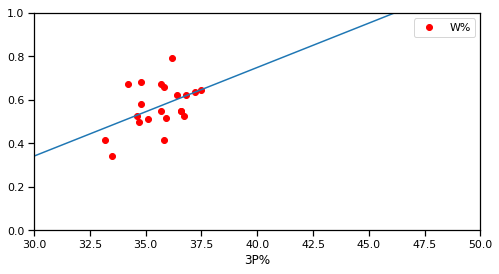

In [18]:
t_x = stats.plot(x='3P%', y='W%', style='ro', figsize=(8,4), legend=True, xlim=(30,50), ylim=(0, 1))
t_x.plot([0,100], [t0, t0+t1*100])
#for xi, yi in zip(three,win):
   # t_x.plot([xi]*2, [yi, t0+t1*xi], 'k:')

In [19]:
a0, a1= fmin(sum_of_squares, [0,1], args=(ast,y))
a0, a1

Optimization terminated successfully.
         Current function value: 0.189944
         Iterations: 27
         Function evaluations: 52


(0.0007106682047015063, 0.026890667434778977)

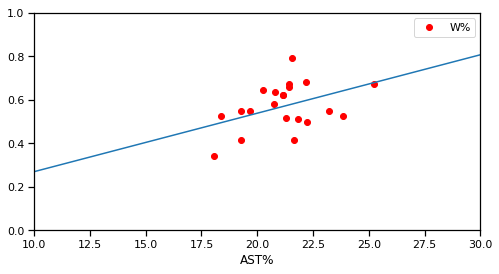

In [20]:
a_x = stats.plot(x='AST%',y = 'W%',style = 'ro',figsize=(8,4),legend = True, xlim=(10,30),ylim=(0,1))
a_x.plot([0,50], [a0, a0+a1*50])

In [21]:
r0, r1= fmin(sum_of_squares, [0,1], args=(reb,y))
r0, r1

Optimization terminated successfully.
         Current function value: 0.199919
         Iterations: 29
         Function evaluations: 53


(0.0008418045043945318, 0.013278198242184684)

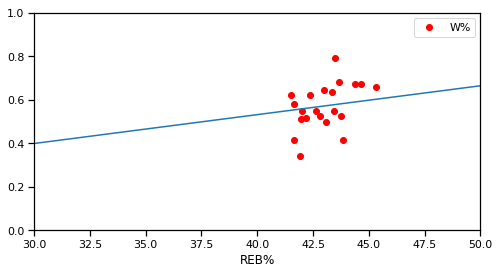

In [24]:
r_x = stats.plot(x='REB%',y = 'W%',style = 'ro',figsize=(8,4),legend = True, xlim=(30,50),ylim=(0,1))
r_x.plot([0,50], [r0, r0+r1*50])

As the ast,reb,3P% get higher, win percentage also gets higher. And the 3P%'s influence is much more powerful

We use Deterministic to track computed quantities inside the model. 

In [25]:
from pymc3 import Normal, HalfCauchy, Deterministic, Model

with Model() as game_model:
    
    intercept = Normal('intercept', 0.5, sd=0.1)
    slope1 = Normal('slope1', 0, sd=20)
    slope2 = Normal('slope2', 0, sd=10)
    slope3 = Normal('slope3', 0, sd =10)
    slope4 = Normal('slope4', 0, sd=30)
    three = Deterministic('three', slope1)
    reb = Deterministic('reb', slope2)
    ast = Deterministic('ast',slope3)
    three_m = Deterministic('three_m',slope4)
    σ = HalfCauchy('σ', 1)

Now we track expected value `μ`

In [28]:
with game_model:
    
    μ = intercept + slope1*three + slope2*reb + slope3*ast+slope4*three_m
    mu_d = Deterministic('mu_d', μ)
    score = Normal('score', mu=μ, sd=σ, observed=y)

Let's use a Markov chain Monte Carlo algorithm, called NUTS (the No U-Turn Sampler) to eastimate a posterior distribution

In [29]:
from pymc3 import sample

with game_model:

    game_sample = sample(5000, tune = 2000, random_seed=RANDOM_SEED,
                         nuts_kwargs=dict(target_accept=.90))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, slope4, slope3, slope2, slope1, intercept]
Sampling 2 chains: 100%|██████████| 14000/14000 [00:28<00:00, 487.71draws/s]


Let's plot posteriors

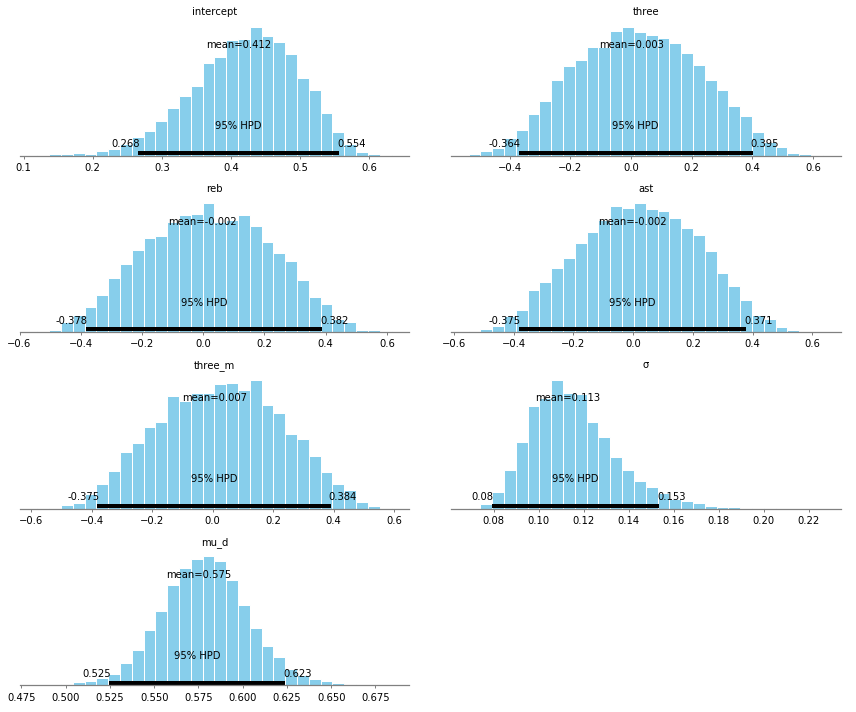

In [30]:
from pymc3 import plot_posterior

plot_posterior(game_sample[500:], varnames=['intercept', 'three','reb','ast','three_m', 'σ', 'mu_d']);

The fitted model can be used to simulate data and the distribution of this simulated data should resemble the distribution of the actual data.

Sampling from the posterior predictive distribution is straighforward in PyMC3. The sample_ppc function draws posterior predictive checks from all of the data likelihoods.

In [43]:
from pymc3 import sample_ppc

with game_model:
    
    game_ppc = sample_ppc(game_sample, 5000)

/Users/guoyixin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """
100%|██████████| 5000/5000 [00:02<00:00, 1921.61it/s]


In [44]:
game_ppc['score'].shape

(5000, 21)

This yields 5000 simulated games corresponding to each of the ten data points in our observation vector.

We plot 21 histograms hist, one for each of the 5,000 simulations per game. Since each simulation yields different points per game, it makes sense that all these simulations put together yeild a histogram. We know see if the mean points per game for all 5,000 simulations matches the real score of each game, represented by a red line.

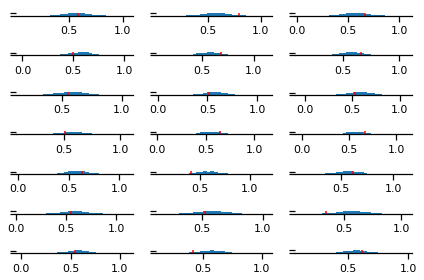

In [45]:
fig, axes = plt.subplots(7, 3)
axes_flat = axes.flatten()

for ax, real_data, sim_data in zip(axes_flat[:], y, game_ppc['score'].T):
    ax.hist(sim_data, bins=30)
    ax.vlines(real_data, *ax.get_ylim(), colors='red')
    ax.set_yticklabels([])
    sns.despine(left=True)

#axes_flat[-1].axis('off')
plt.tight_layout()

In [46]:
game_ppc['score'][0]

array([0.61150896, 0.56485303, 0.62713113, 0.44893481, 0.55885381,
       0.50313901, 0.67099161, 0.53320041, 0.54530008, 0.55741187,
       0.57127359, 0.5683373 , 0.47334249, 0.63873113, 0.6209331 ,
       0.5297623 , 0.50892151, 0.60511601, 0.41204911, 0.70858212,
       0.64482081])

In [47]:
len(game_sample['σ'])

10000

Now let's collect our simulated latent parameters from the simulation, and build our theoretical model with these parameters. The parameters now drive the win percentage, which is what we want.
Since the win% is a normal distribution, we enter its mean and its standard deviation as modelled:

In [51]:
reb = game_sample['reb']
three_m = game_sample['three_m']
intercept = game_sample['intercept']
three = game_sample['three']
ast = game_sample['ast']
sigs = game_sample['σ']

win_samples = Normal.dist(intercept + three_m + reb +three + ast, sigs).random()


The mean of win% is:

In [52]:
win_samples.mean()

0.41709740611884627

In [53]:
len(win_samples)

10000

In [54]:
(win_samples > 0.8).mean()

0.205

Let's increase REB 50%
By the way, because we just have 20 season's data(before 1998, NBA is quite different from now), also the factors in game is much more complicated. So we increase them by a wide margin in order to see a more clear result

In [55]:
higher_reb = reb*1.5
new_win_samples = Normal.dist(intercept + three_m + higher_reb + three + ast, sigs).random()

In [57]:
(new_win_samples > 0.8).mean()

0.2347

Win percentage increased! Then we do the same thing to the other three factors

In [59]:
higher_three_m = three_m *1.5
new_win_samples = Normal.dist(intercept + higher_three_m + reb + three + ast, sigs).random()

In [60]:
(new_win_samples > 0.8).mean()

0.2432

In [61]:
higher_ast = ast *1.5
new_win_samples = Normal.dist(intercept +three_m + reb + three + higher_ast, sigs).random()

In [62]:
(new_win_samples > 0.8).mean()

0.2388

In [64]:
higher_three = three *1.5
new_win_samples = Normal.dist(intercept +three_m + reb + higher_three + ast, sigs).random()

In [65]:
(new_win_samples > 0.8).mean()

0.2352

We can conclue that by increasing 3P%, 3PM%,Ast%,Reb%, Houston Rockets is able to increase win percentage

Now, we are going to lower them

In [67]:
lower_reb = reb*0.5
new_win_samples = Normal.dist(intercept + three_m + lower_reb + three + ast, sigs).random()

In [68]:
(new_win_samples > 0.8).mean()

0.1784

In [69]:
lower_ast = ast*0.5
new_win_samples = Normal.dist(intercept + three_m + lower_ast + three + reb, sigs).random()

In [70]:
(new_win_samples > 0.8).mean()

0.1774

In [71]:
lower_three= three*0.5
new_win_samples = Normal.dist(intercept + three_m + lower_three + ast + reb, sigs).random()

In [72]:
(new_win_samples > 0.8).mean()

0.1761

In [75]:
lower_three_m = three_m *0.5
new_win_samples = Normal.dist(intercept + lower_three_m + reb + three + ast, sigs).random()

In [76]:
(new_win_samples > 0.8).mean()

0.1771

As the factors get lower, win percentage gets lower too!
We did it!